# Une régression logistique sur le jeu de données Titanic

## Importer les librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importer les données et commencer à explorer le dataset

#### Le jeu de données titanic.csv est chargé dans votre environnement.

In [2]:
data = pd.read_csv('Data/titanic.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### Utiliser les méthodes des DataFrames pour avoir un premier aperçu de vos données : info(), describe() et count()

In [3]:
#data.count()
#data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


## Gestion des valeurs manquantes

#### Utiliser la fonction heatmap de seaborn pour visualiser les valeurs manquantes sur un graphique et identifier les valeurs manquantes

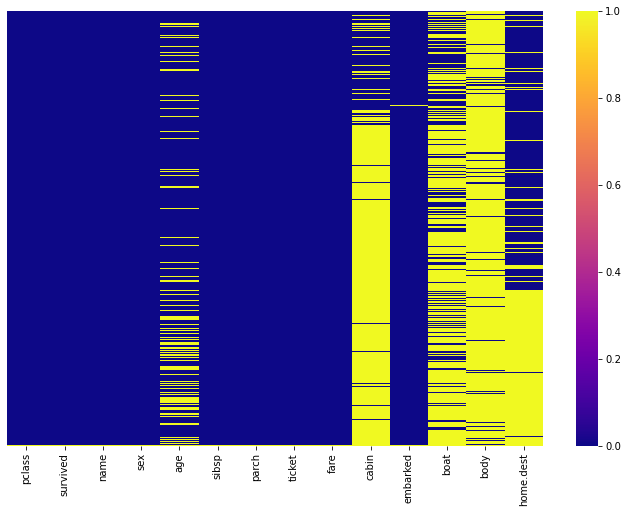

In [4]:
plt.figure(figsize = (12,8))
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='plasma');

#### Supprimer les colonnes et/ou lignes qui vous paraissent inutilisables

In [5]:
data.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# supprimer les colonnes et lignes problématiques ou dont on ne se servira pas
data.drop(1309,axis=0,inplace=True) #la dernière ligne
data.drop(columns=['name','ticket','cabin','boat','body','home.dest'],inplace=True)
data.tail()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
1304,3.0,0.0,female,14.5,1.0,0.0,14.4542,C
1305,3.0,0.0,female,NaN,1.0,0.0,14.4542,C
1306,3.0,0.0,male,26.5,0.0,0.0,7.2250,C
1307,3.0,0.0,male,27.0,0.0,0.0,7.2250,C
1308,3.0,0.0,male,29.0,0.0,0.0,7.8750,S


#### Focus sur l'âge : peu de valeurs manquantes, on peut donc faire un peu d'imputation

On pourrait imputer tout simplement l'âge moyen pour toutes les valeurs manquantes. C'est une solution viable et assez simple. Mais on peut faire mieux en s'intéressant par exemple à l'âge moyen au sein de certain groupes...  

Regardez en utilisant les graphiques adéquats la répartition de l'âge par classe et par sexe.

Conclure sur quelle imputation serait pertinente. 

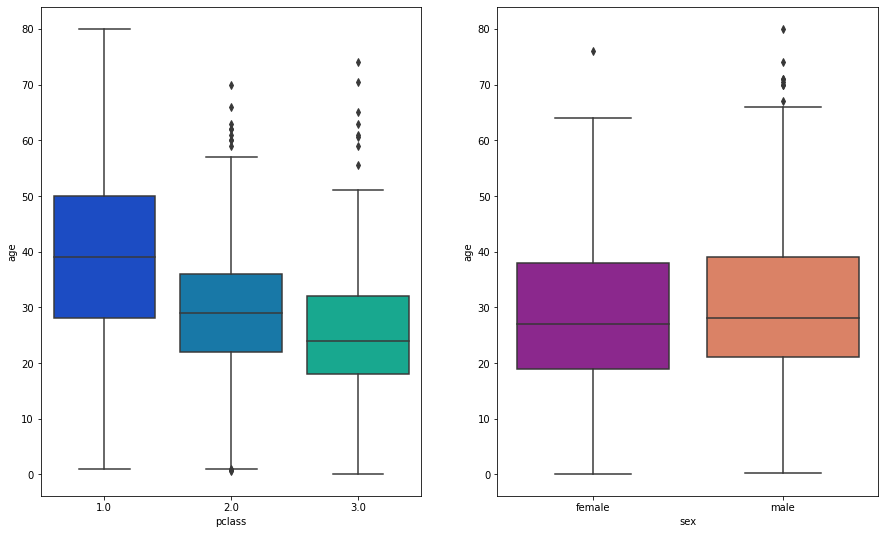

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 9))
sns.boxplot(x='pclass',y='age',data=data,palette='winter',ax=ax1)
sns.boxplot(x='sex',y='age',data=data,palette='plasma',ax=ax2);

Faire l'imputation choisie pour les âges manquants.  
_Indication : une solution est de créer une fonction qui renvoie l'âge voulu selon les cas puis de l'appliquer sur les lignes avec la méthode apply_

In [8]:
data['age'] = data['age'].fillna(data.groupby(['pclass','sex'])['age'].transform('mean'))

Réafficher la visualisation des données manquantes avec heatmap. Que constatez-vous ? 

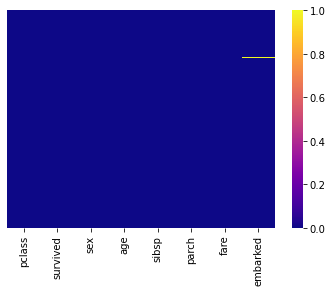

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='plasma');

Vérifier où sont les données encore manquantes avec la méthode DataFrame.info() par exemple puis supprimer les lignes concernées avec la méthode adaptée.  
Vérifier à nouveau ce qu'il en est des valeurs manquantes avec DataFrame.count() pour changer

In [10]:
data.count()

pclass      1309
survived    1309
sex         1309
age         1309
sibsp       1309
parch       1309
fare        1308
embarked    1307
dtype: int64

In [11]:
#suppression des 2 ou 3 lignes ayant des valeurs manquantes (sur fare et embarked)
data.dropna(inplace=True, axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   float64
 1   survived  1306 non-null   float64
 2   sex       1306 non-null   object 
 3   age       1306 non-null   float64
 4   sibsp     1306 non-null   float64
 5   parch     1306 non-null   float64
 6   fare      1306 non-null   float64
 7   embarked  1306 non-null   object 
dtypes: float64(6), object(2)
memory usage: 91.8+ KB


## Analyse de données : visualisation

Avec seaborn, afficher une série de graphiques pour avoir une idée de la répartition des variables indépendantes et visualiser les effets possibles des différentes variables indépendantes sur la survie ou non.  
_Indication : vous pourrez regarder par exemple la distribution des âges, des tarifs et comparer sexe vs survie, classe vs survie,sibsp vs survie en utilisant les visualisations que vous souhaitez_

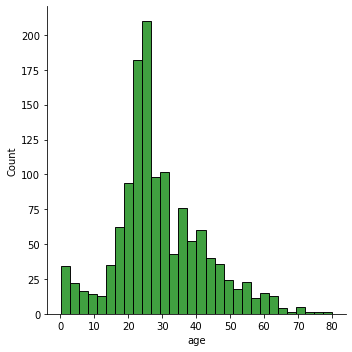

In [12]:
#distribution des âges
sns.displot(data['age'], kde=False, bins=30, color='green');

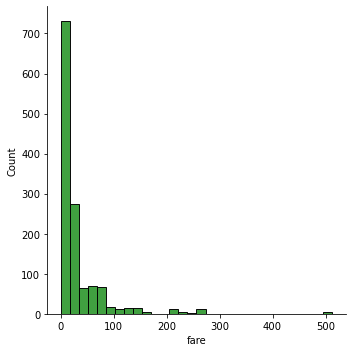

In [13]:
#distribution du tarif des billets
sns.displot(data['fare'], kde=False, bins=30, color='green');

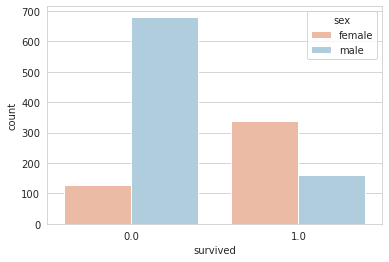

In [14]:
# sexe vs survie avec countplot
sns.set_style('whitegrid')
sns.countplot(x='survived', hue='sex', data=data, palette='RdBu');

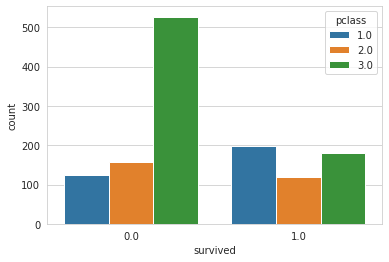

In [15]:
# classe vs survie avec countplot
sns.set_style('whitegrid')
sns.countplot(x='survived', hue='pclass', data=data);

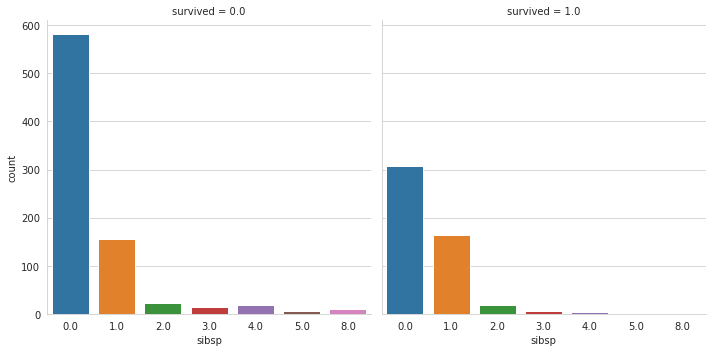

In [16]:
#sibsp vs survie avec catplot
sns.catplot(x='sibsp',col='survived', data=data, kind="count");

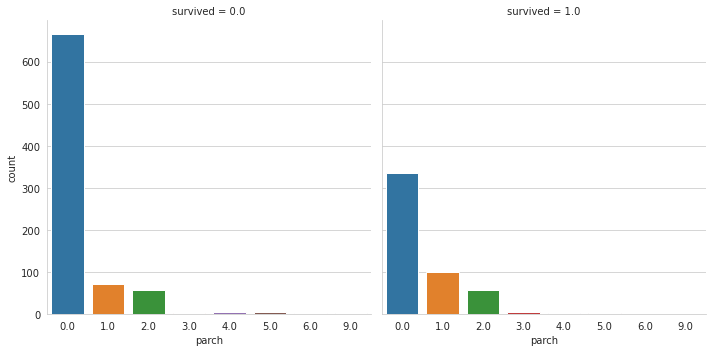

In [17]:
#parch vs survie avec catplot
sns.catplot(x='parch',col='survived', data=data, kind="count");

## Gestion des variables catégoriques

#### Identifier les variables catégoriques et les transformer de sorte à pouvoir les utiliser ensuite dans votre modèle

In [18]:
sex_dum = pd.get_dummies(data['sex'],drop_first=True)
embark_dum = pd.get_dummies(data['embarked'],drop_first=True)
class_dum = pd.get_dummies(data['pclass'],drop_first=True)
data.drop(['sex','embarked','pclass'],axis=1,inplace=True)
data = pd.concat([data,sex_dum,embark_dum,class_dum],axis=1)
data

,survived,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,1.0,29.000000,0.0,0.0,211.3375,0,0,1,0,0
1,1.0,0.916700,1.0,2.0,151.5500,1,0,1,0,0
2,0.0,2.000000,1.0,2.0,151.5500,0,0,1,0,0
3,0.0,30.000000,1.0,2.0,151.5500,1,0,1,0,0
4,0.0,25.000000,1.0,2.0,151.5500,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1304,0.0,14.500000,1.0,0.0,14.4542,0,0,0,0,1
1305,0.0,22.185307,1.0,0.0,14.4542,0,0,0,0,1
1306,0.0,26.500000,0.0,0.0,7.2250,1,0,0,0,1
1307,0.0,27.000000,0.0,0.0,7.2250,1,0,0,0,1


## Création d'un train set et test set

In [19]:
from sklearn.model_selection import train_test_split
X = data.drop('survived',axis=1)
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## Création et entraînement du modèle

In [20]:
# Instanciation et entraînement du modèle
from sklearn.linear_model import LogisticRegression
reglog = LogisticRegression(solver='liblinear')
reglog.fit(X_train.values, y_train.values)

# Prédictions sur le test set
y_pred = reglog.predict(X_test.values)

## Évaluation du modèle

Vous pourrez utiliser la fonction classification_report, la matrice de confusion ou tout autre méthode d'évaluation du modèle.

In [21]:
# Accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8103975535168195


In [22]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       205
         1.0       0.77      0.70      0.74       122

    accuracy                           0.81       327
   macro avg       0.80      0.79      0.79       327
weighted avg       0.81      0.81      0.81       327



In [23]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[179  26]
 [ 36  86]]


In [24]:
# Coefficients
coef = pd.DataFrame(np.concatenate([reglog.intercept_.reshape(-1,1), reglog.coef_],axis=1),
             index = ["Coefficients"],
             columns = ["constante"]+list(X.columns)).T

coef["OR"] = np.exp(coef.Coefficients)
coef["1/OR"] = np.exp(-coef.Coefficients)
coef

,Coefficients,OR,1/OR
constante,2.834862,17.028042,0.058727
age,-0.023757,0.976523,1.024042
sibsp,-0.243194,0.784119,1.275316
parch,-0.042094,0.958780,1.042992
fare,0.003482,1.003488,0.996524
male,-2.287366,0.101534,9.848961
Q,-0.173814,0.840453,1.189834
S,-0.416481,0.659363,1.516615
2.0,-0.639745,0.527427,1.895997
3.0,-1.486046,0.226265,4.419588


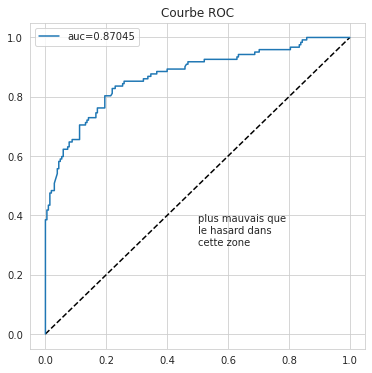

In [28]:
# Courbe ROC
from sklearn.metrics import roc_curve, auc
proba = reglog.predict_proba(X_test.values)
fpr, tpr, thresholds = roc_curve(y_test, proba[:, 1], pos_label=1, drop_intermediate=False)

fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot([0, 1], [0, 1], 'k--')
# aucf = roc_auc_score(y_test == clr.classes_[0], probas[:, 0]) # première méthode
aucf = auc(fpr, tpr)  # seconde méthode
ax.plot(fpr, tpr, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax.legend();

In [26]:
X.head()

,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,29.0000,0.0,0.0,211.3375,0,0,1,0,0
1,0.9167,1.0,2.0,151.5500,1,0,1,0,0
2,2.0000,1.0,2.0,151.5500,0,0,1,0,0
3,30.0000,1.0,2.0,151.5500,1,0,1,0,0
4,25.0000,1.0,2.0,151.5500,0,0,1,0,0


In [27]:
# Prédiction de survie pour une personne...
reglog.predict([[25,0,0,200,1,1,0,1,0]])

array([0.])